In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['figure.figsize'] = [20, 8]

### Examinando os relacionamentos entre as características e a resposta

In [4]:
df = pd.read_csv("/content/drive/MyDrive/DADOS/dados_limpos_usuarios_de_credito_DATACLEAN.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
items_to_remove = ['ID',
                   'SEX',
                   'PAY_2',
                   'PAY_3',
                   'PAY_4',
                   'PAY_5',
                   'PAY_6',
                   'EDUCATION_CAT',
                   'graduate school',
                   'none',
                   'others',
                   'university',
                   'high school']

In [6]:
features_response = [item for item in df if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Verificando a correlação

In [7]:
corr = df[features_response].corr()
corr.iloc[:5 , :5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


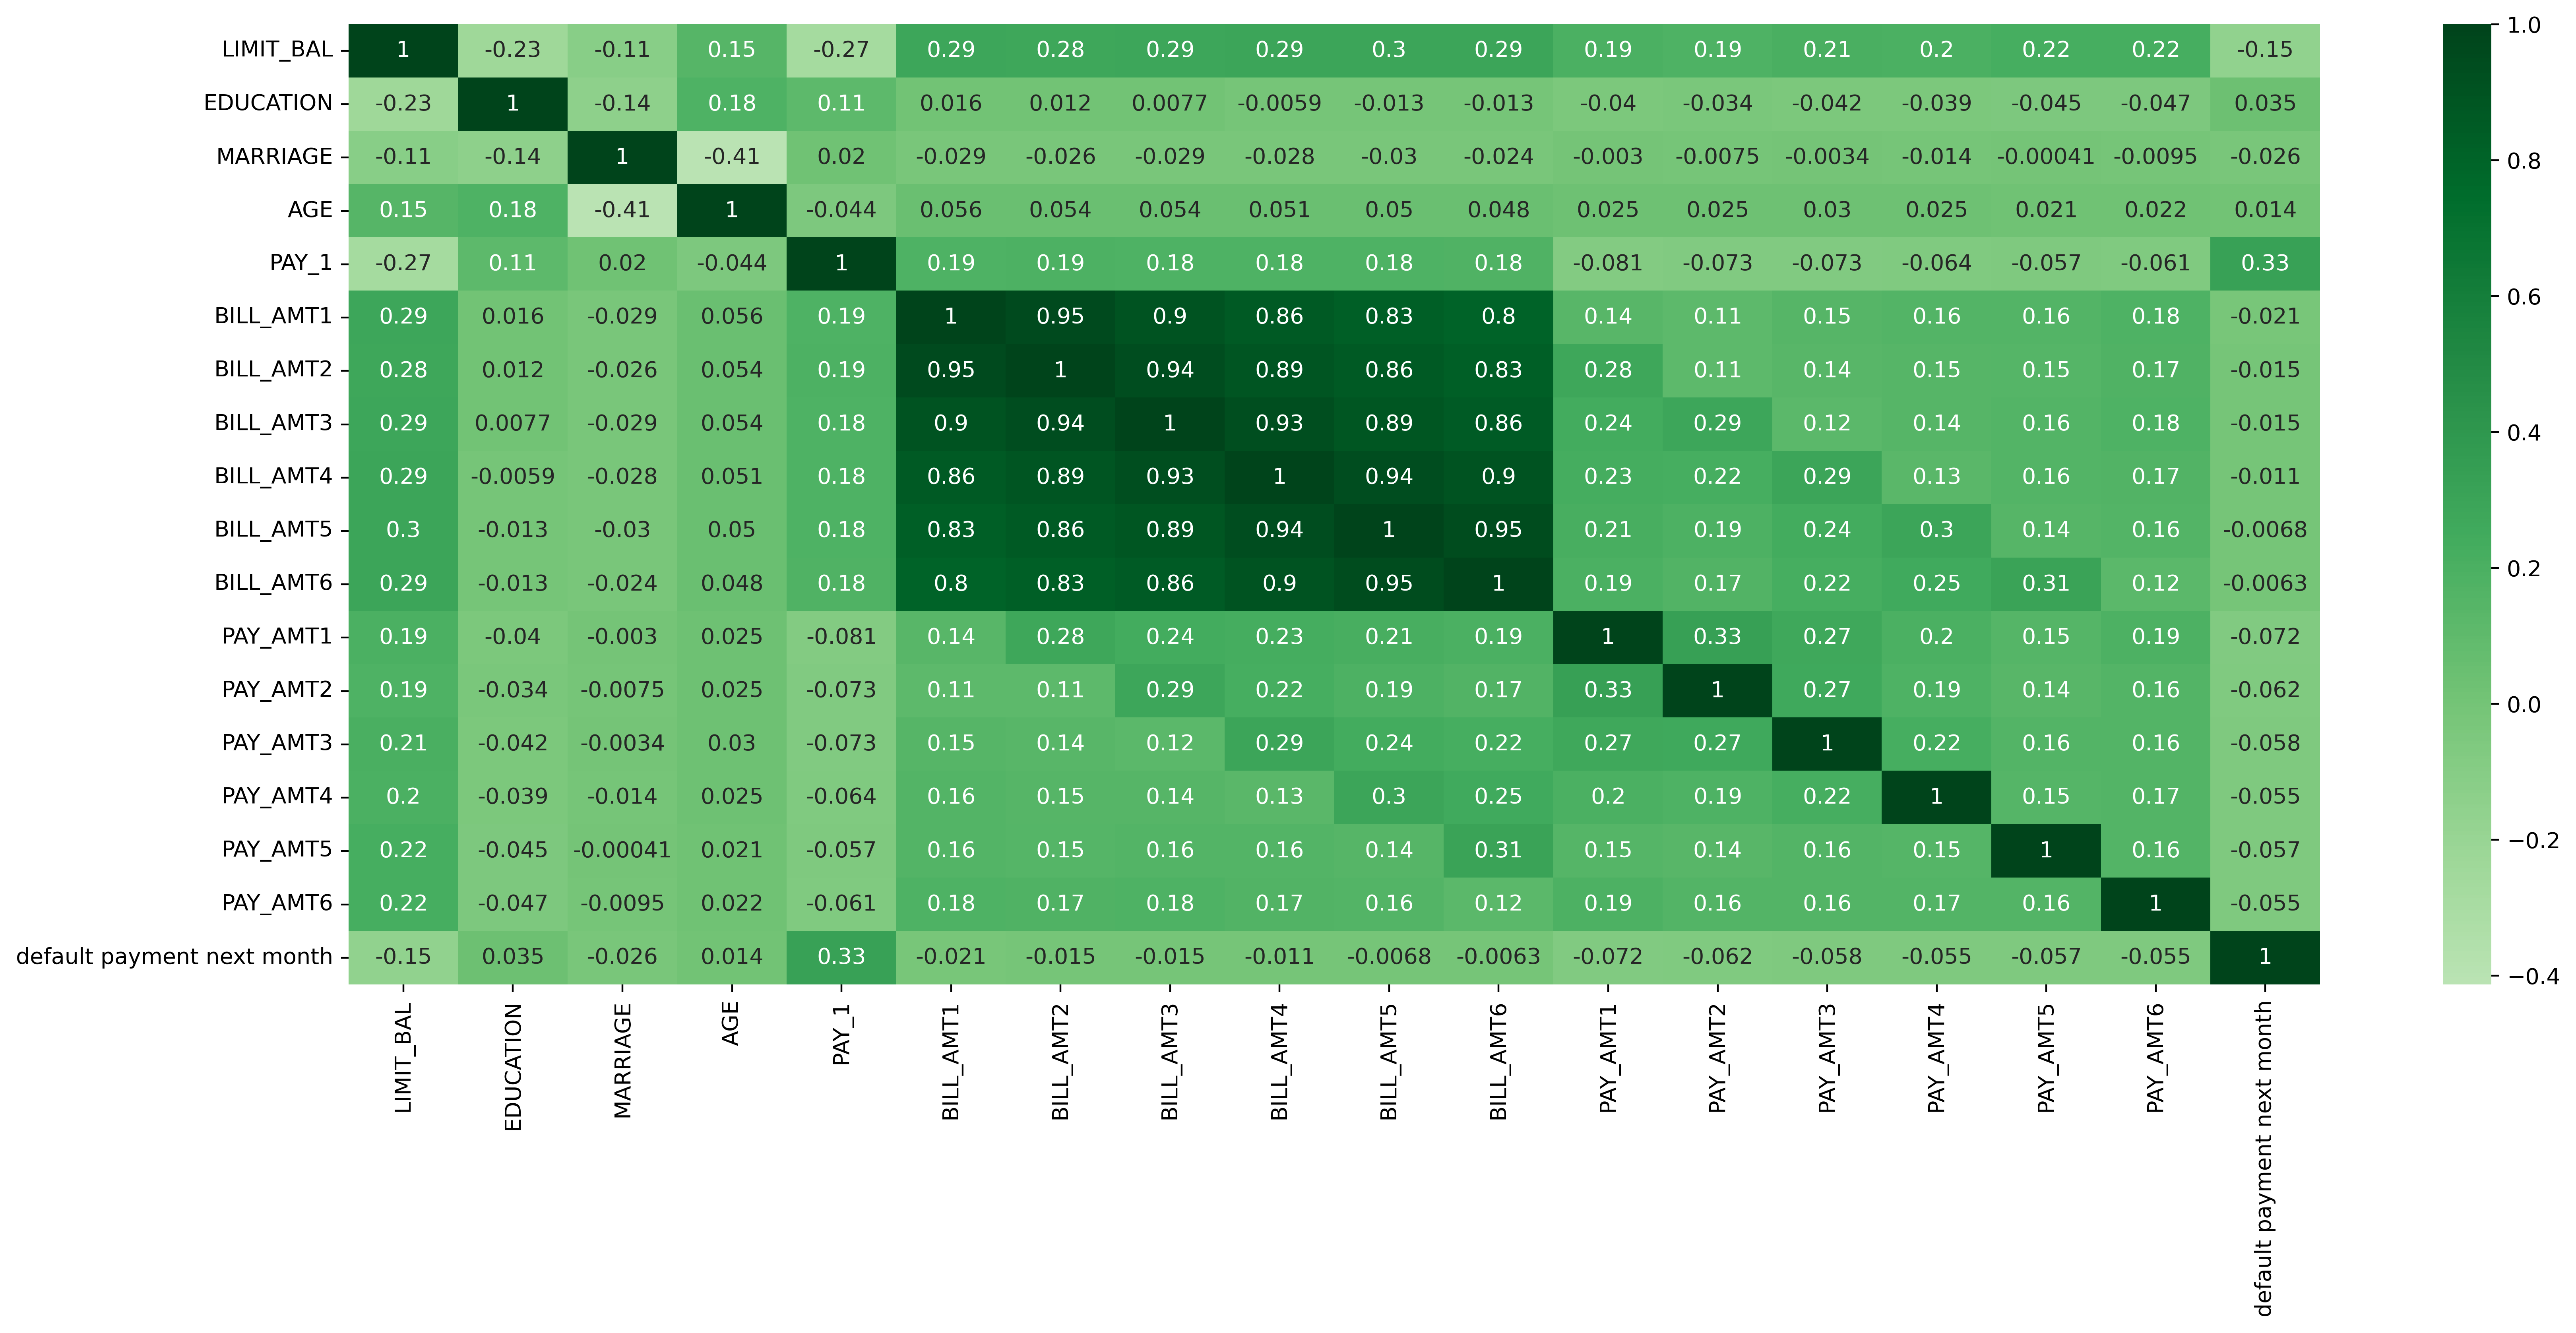

In [8]:
sns.heatmap(corr,
            xticklabels= corr.columns.values,
            yticklabels= corr.columns.values,
            center= 0,
            cmap= "Greens",
            annot= True)

### Teste F e seleção de características univariada

In [9]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [10]:
[f_stat, f_p_value] = f_classif(X, y)

In [11]:
f_test_df = pd.DataFrame({"Feature": features_response[:-1],
                          "F statistic": f_stat,
                          "p value": f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [14]:
selector = SelectPercentile(f_classif, percentile= 20)

In [15]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [17]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [18]:
features = features_response[:-1]

In [19]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]

In [21]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [22]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [23]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


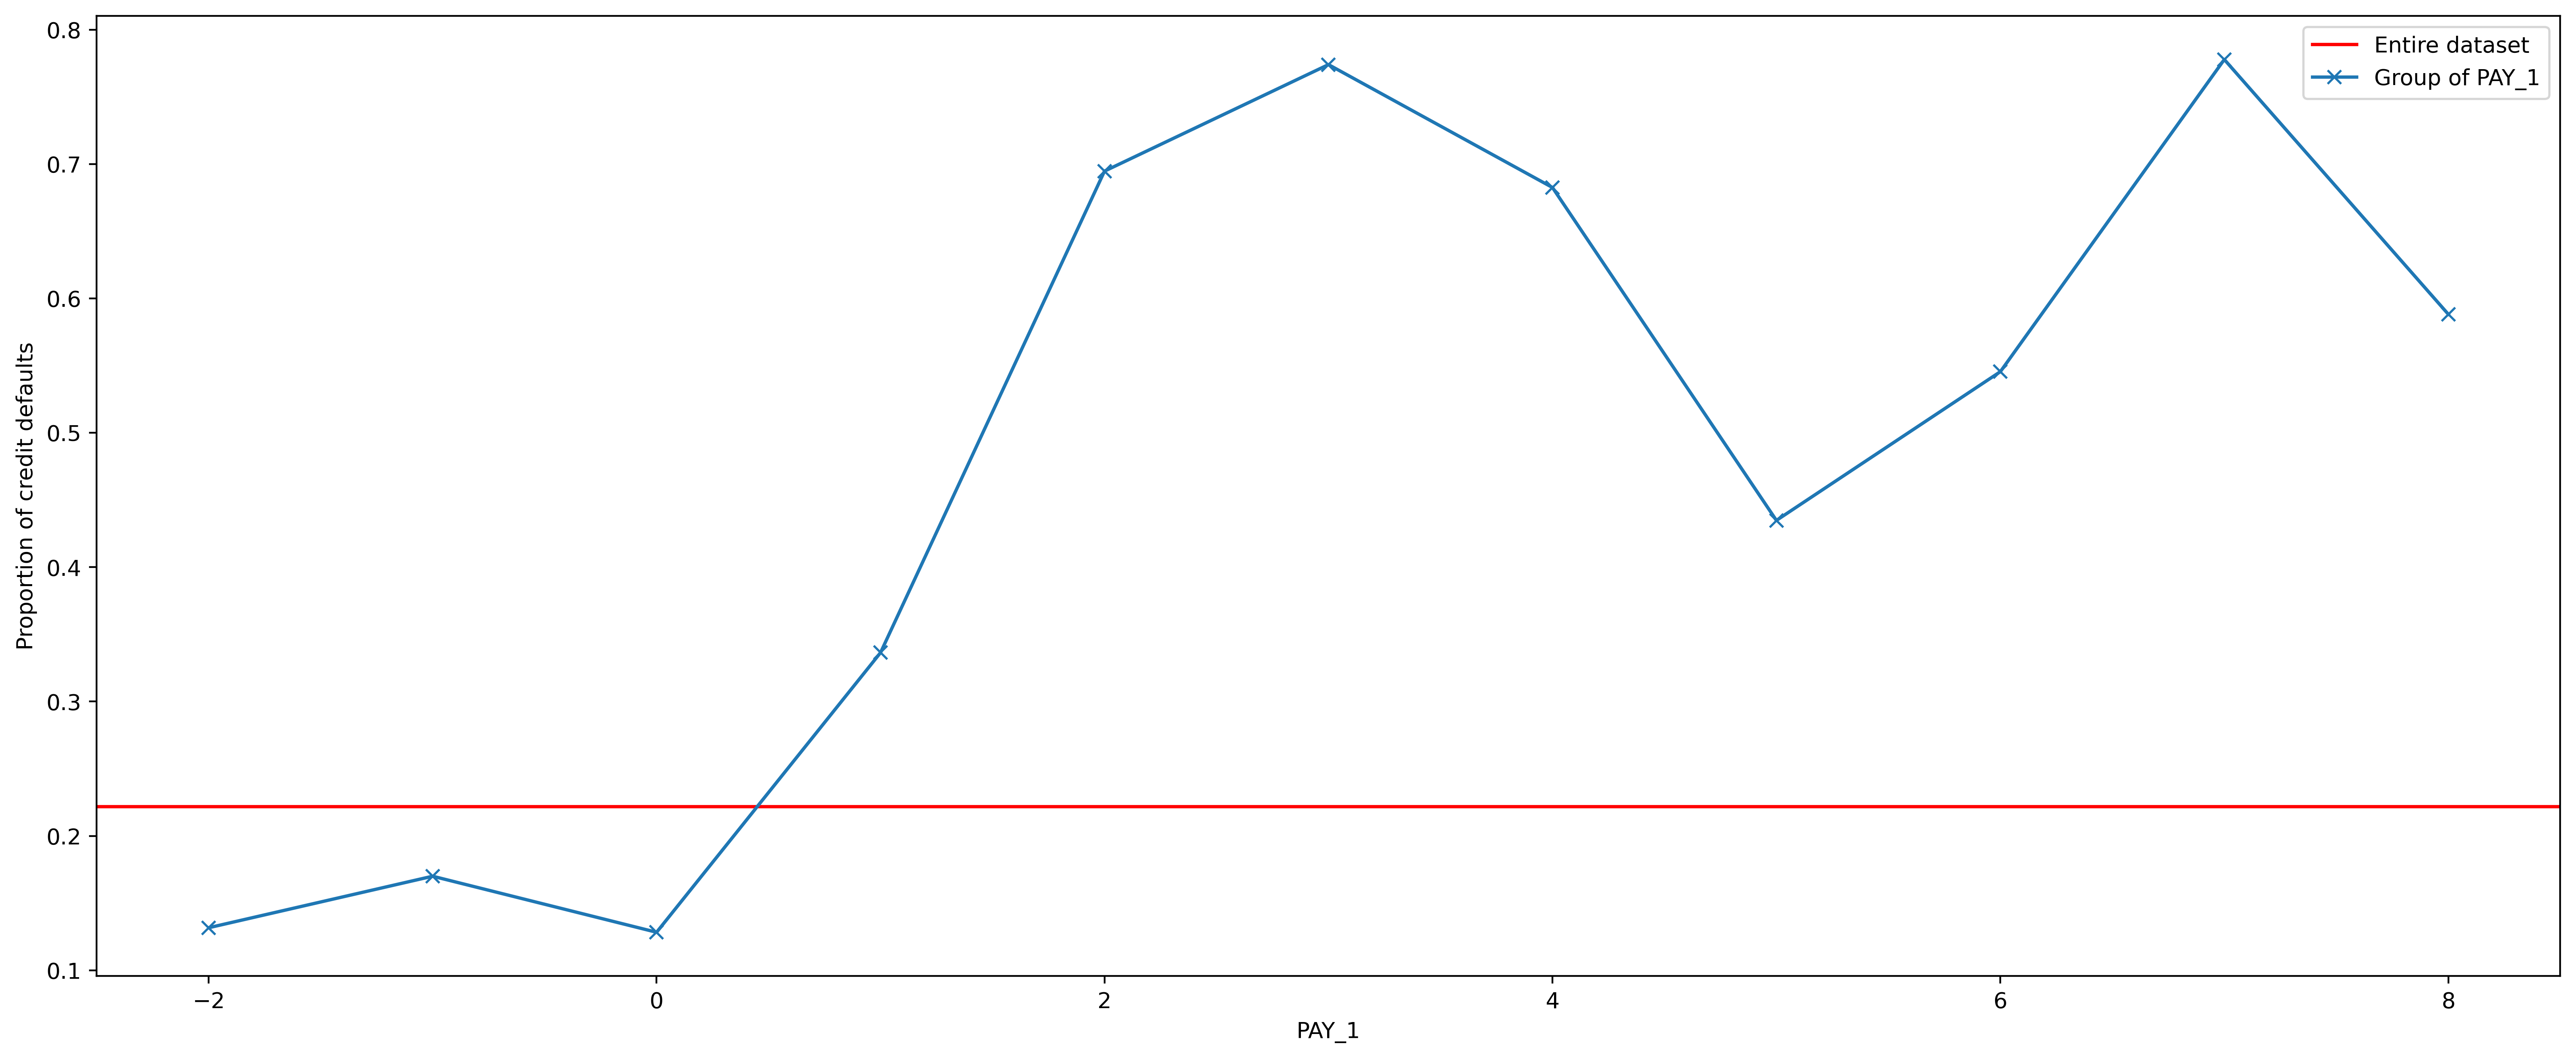

In [27]:
axes = plt.axes()
axes.axhline(overall_default_rate, color= 'red')
group_by_pay_mean_y.plot(marker= 'x',
                        legend= False,
                        ax= axes)
axes.set_ylabel("Proportion of credit defaults")
axes.legend(["Entire dataset",
             "Group of PAY_1"])

In [28]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

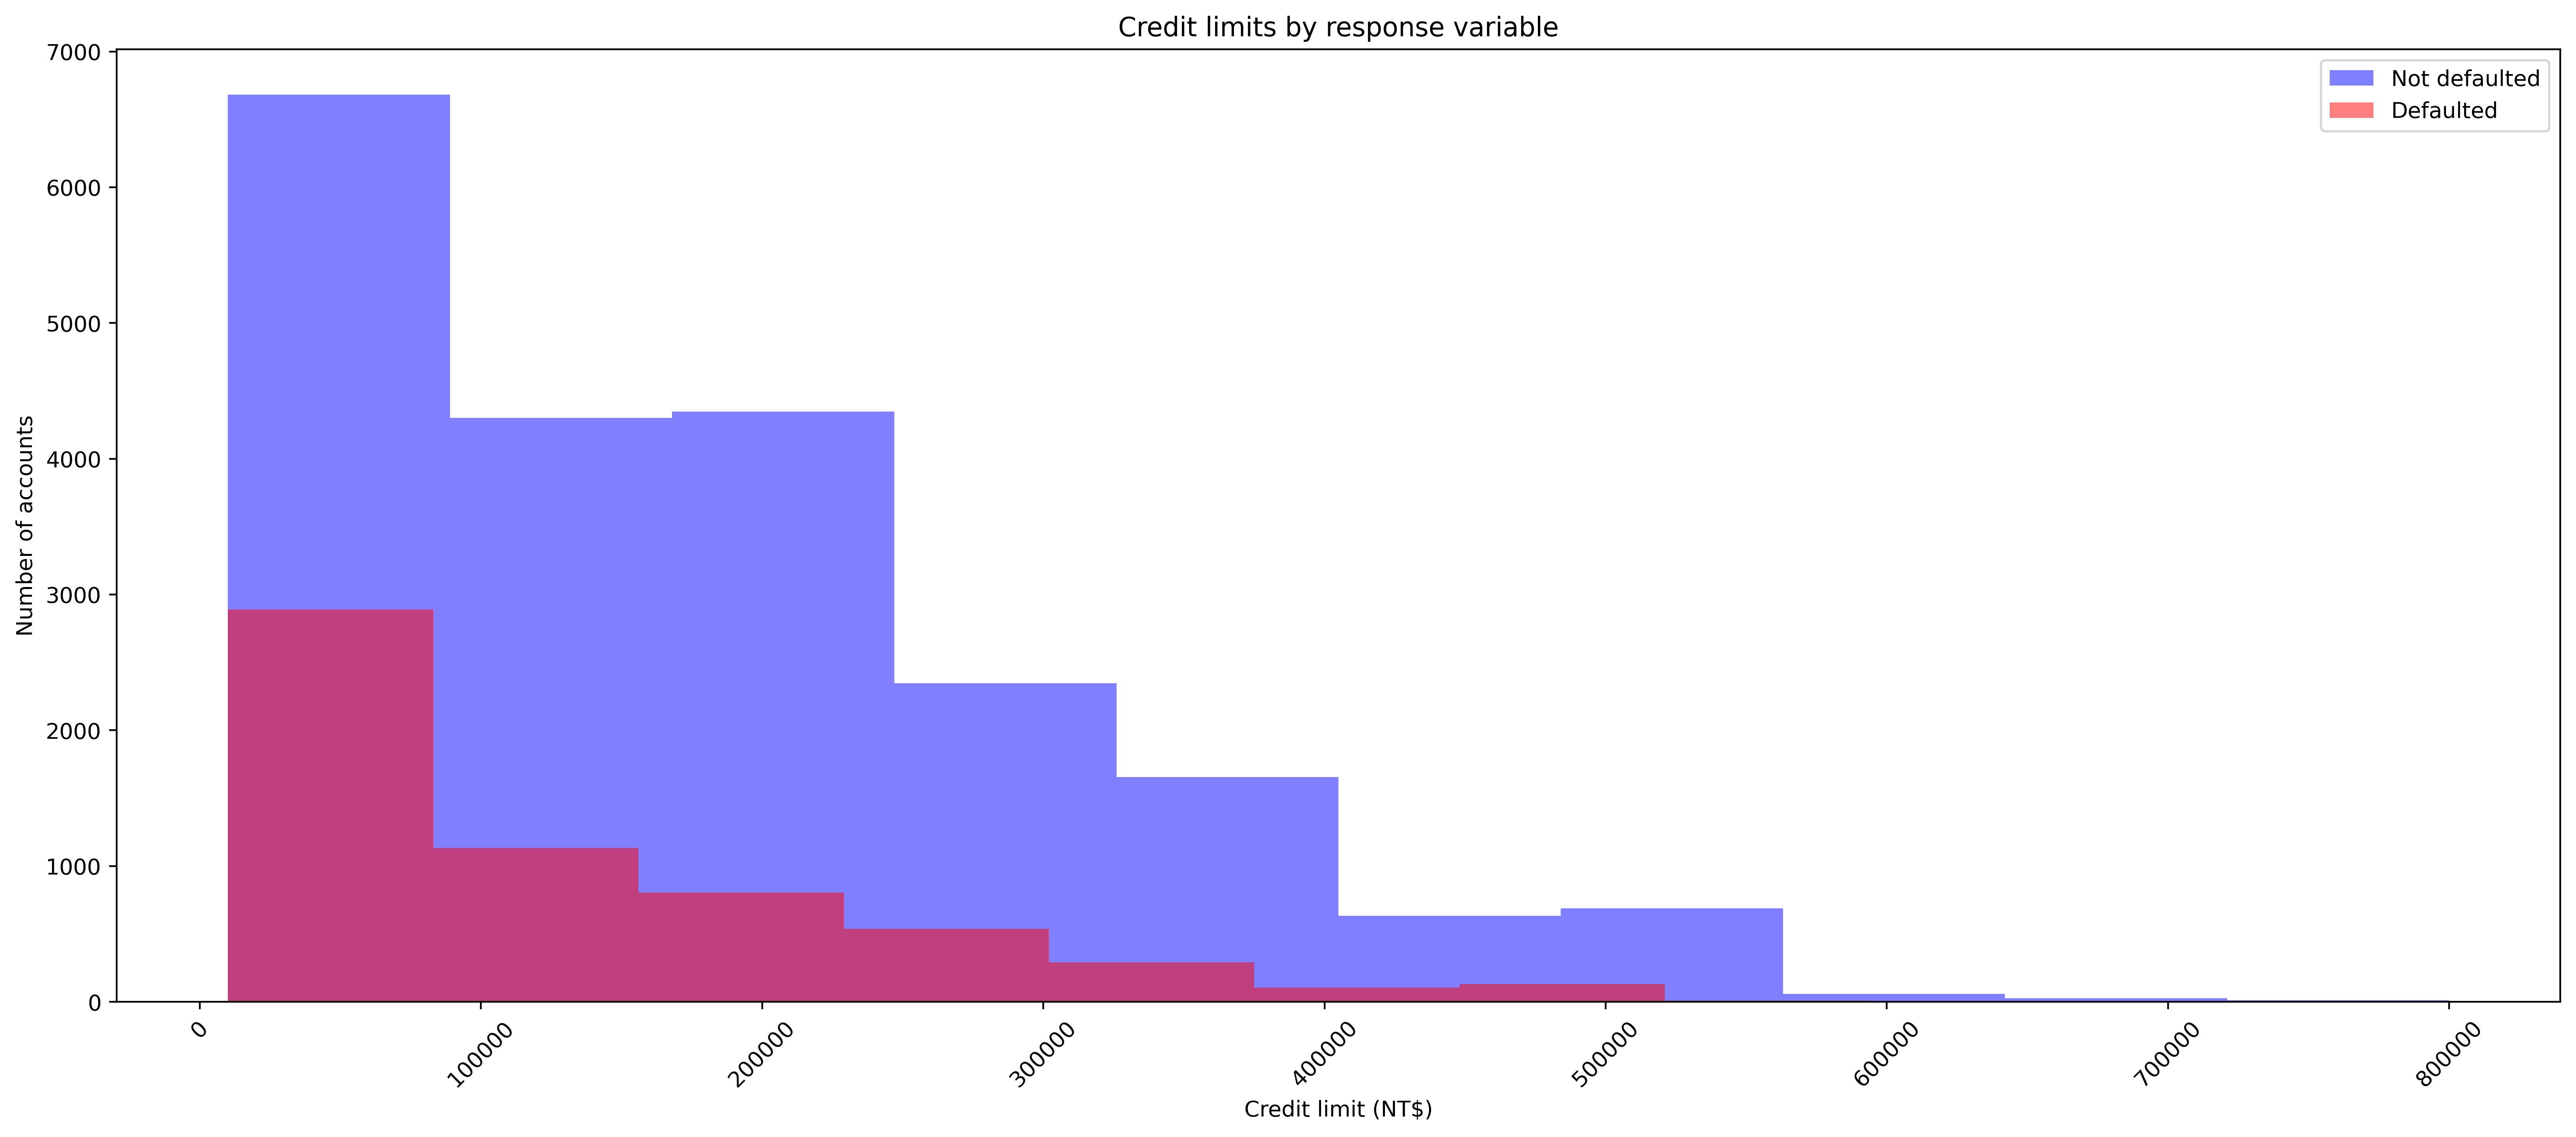

In [30]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'],
          alpha= 0.5,
          color= 'blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'],
          alpha= 0.5,
          color= 'red')
axes.tick_params(axis= 'x',
                 labelrotation= 45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [32]:
df['LIMIT_BAL'].max()

800000

In [37]:
bin_edges = list(range(0, 850000, 50000))
print(bin_edges[-1])

800000


Text(0.0, 1.0, 'Normalized distributions of credit limits by response variable')

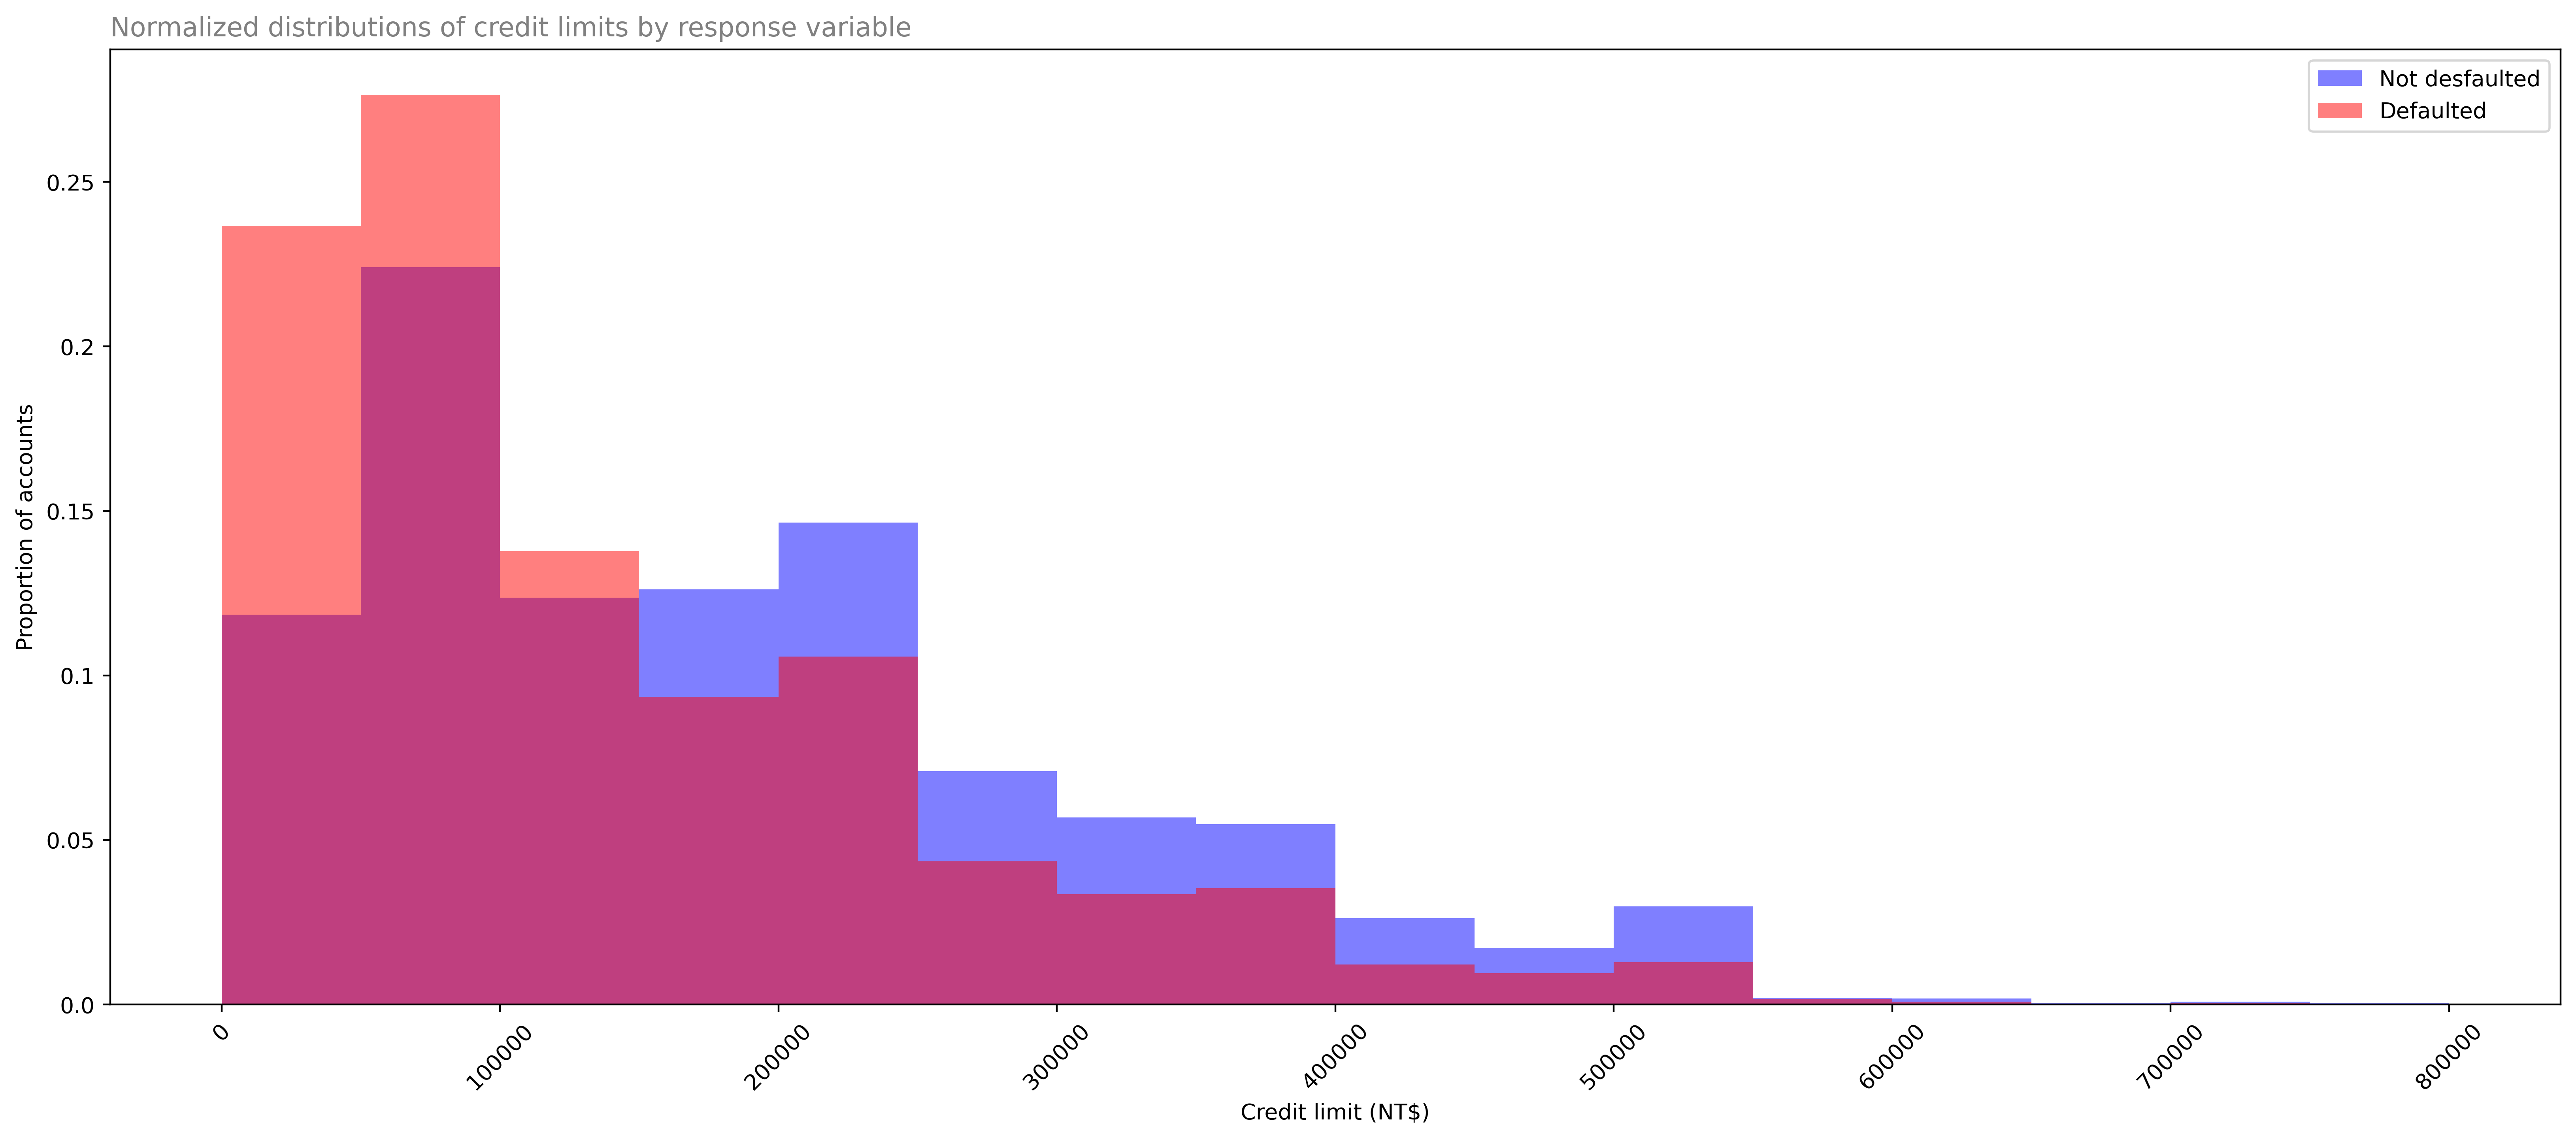

In [45]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['axes.titlecolor'] = 'Grey'
axes = plt.axes()
axes.hist(df.loc[neg_mask,
                 'LIMIT_BAL'],
          bins= bin_edges,
          alpha= 0.5,
          density= True,
          color= 'blue')
axes.hist(df.loc[pos_mask,
                 'LIMIT_BAL'],
          bins= bin_edges,
          alpha= 0.5,
          density= True,
          color= 'red')
axes.tick_params(axis= 'x',
                 labelrotation= 45)
axes.set_xlabel('Credit limit (NT$)',
                )
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not desfaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable',
               loc= 'left')